In [33]:
## Libraries
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

In [34]:
## connection+df

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['BabyNames']
collection = db['BabyNamesUSA']

# df
data = list(collection.find())
df = pd.DataFrame(data)

In [35]:
## Top Male and Female Names

# Filter for female names
df_female = df[df['Gender'] == 'F']
name_occurrences_female = df_female.groupby('Name')['Occurrences'].sum().reset_index()
top_names_female = name_occurrences_female.sort_values(by='Occurrences', ascending=False).head(10)

# Filter for male names
df_male = df[df['Gender'] == 'M']
name_occurrences_male = df_male.groupby('Name')['Occurrences'].sum().reset_index()
top_names_male = name_occurrences_male.sort_values(by='Occurrences', ascending=False).head(10)

# Create a single DataFrame for Plotly
top_names_female['Gender'] = 'Female'
top_names_male['Gender'] = 'Male'
combined_df = pd.concat([top_names_female, top_names_male])

# Create the plot
fig = go.Figure()

# Add Female Names
fig.add_trace(go.Bar(
    y=top_names_female['Name'],
    x=top_names_female['Occurrences'],
    name='Girl',
    orientation='h',
    marker_color='#ef476f'
))

# Add Male Names
fig.add_trace(go.Bar(
    y=top_names_male['Name'],
    x=top_names_male['Occurrences'],
    name='Boy',
    orientation='h',
    marker_color='#4361ee'
))

# Update layout to match the style of the given example
fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Total Occurrences', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title='Name', showline=True, linewidth=2, linecolor='black'),
    legend_title='Gender',
    font=dict(family="cursive", size=12),
    plot_bgcolor='white',
    width=800,
    height=600,
    title='Top 10 Most Popular Names by Gender',
    title_x=0.5
)

fig.show()


In [36]:
## Trend of male names that had largest difference in occurances after 2000

names_to_plot = [
    'Mary', 'Patricia', 'Barbara', 'Linda', 'Susan'
]

df_filtered = df[df['Name'].isin(names_to_plot)]

df_grouped = df_filtered.groupby(['year', 'Name'])['Occurrences'].sum().reset_index()

color_sequence = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2', '#073b4c']

fig = px.line(df_grouped, x='year', y='Occurrences', color='Name',
              line_shape='spline',
              markers=False,
              title='Occurrences of Specific Names Over Time',
              color_discrete_sequence=color_sequence)

fig.update_layout(
    xaxis=dict(title='Year', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title='Occurrences', showline=True, linewidth=2, linecolor='black'),
    legend_title='Name',
    font=dict(family="cursive", size=12),
    plot_bgcolor='white',
    width=1000,
    height=800,
    title_x=0.5
)

fig.show()


In [37]:
## Trend of female names that had largest difference in occurances after 2000

male_names_to_plot = [
    'Robert', 'John', 'James', 'Richard', 'Michael'
]

df_filtered_male = df[df['Name'].isin(male_names_to_plot) & (df['Gender'] == 'M')]

df_grouped_male = df_filtered_male.groupby(['year', 'Name'])['Occurrences'].sum().reset_index()

color_sequence_male = ['#016cdf', '#f2b5d4', '#ff9d0a', '#1a936f', '#2f184b']

fig_male = px.line(df_grouped_male, x='year', y='Occurrences', color='Name',
                   line_shape='spline',
                   markers=False,
                   title='Occurrences of Specific Male Names Over Time',
                   color_discrete_sequence=color_sequence_male)

fig_male.update_layout(
    xaxis=dict(title='Year', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title='Occurrences', showline=True, linewidth=2, linecolor='black'),
    legend_title='Name',
    font=dict(family="cursive", size=12),
    plot_bgcolor='white',
    width=1000,
    height=800,
    title_x=0.5
)

fig_male.show()


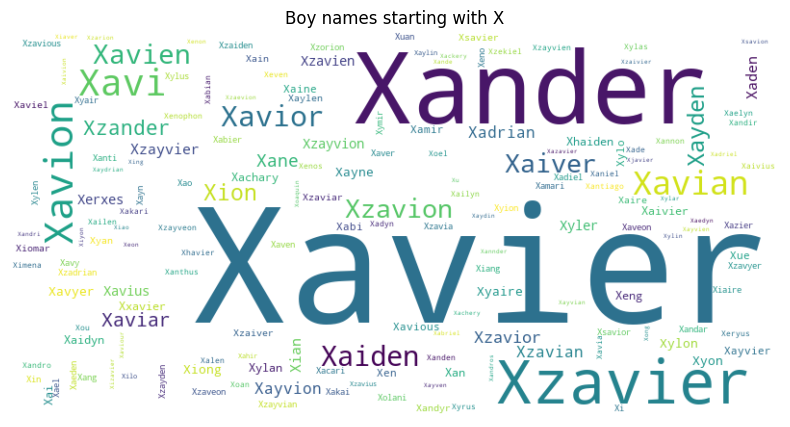

In [38]:
## Most unique Male names
df_grouped_male = df_male.groupby('Name')['Occurrences'].sum().reset_index()

df_filtered_male = df_grouped_male[
    (df_grouped_male['Name'].str.startswith('X'))
]

word_freq = {row['Name']: row['Occurrences'] for index, row in df_filtered_male.iterrows()}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Boy names starting with X')
plt.show()

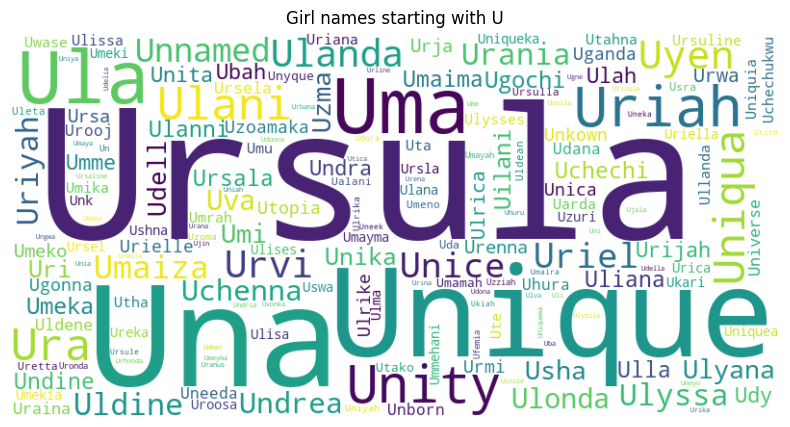

In [39]:
## Most unique female names
df_grouped_female = df_female.groupby('Name')['Occurrences'].sum().reset_index()

df_filtered_female = df_grouped_female[
    (df_grouped_female['Name'].str.startswith('U')) &
    (df_grouped_female['Name'] != 'Unknown')
]

word_freq = {row['Name']: row['Occurrences'] for index, row in df_filtered_female.iterrows()}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Girl names starting with U')
plt.show()